# Assignment 2 - Carbon Markets Pricing Model

In [6]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Define parameters
num_records = 1000
project_types = ['Reforestation', 'Renewable Energy', 'Methane Capture', 'Energy Efficiency']
locations = ['Africa', 'Asia', 'Europe', 'North America', 'South America']
vintage_years = np.arange(2000, 2025)
co_benefits = ['High', 'Medium', 'Low', 'None']

# Generate synthetic data
data = {
    'Project Type': np.random.choice(project_types, num_records),
    'Location': np.random.choice(locations, num_records),
    'Vintage': np.random.choice(vintage_years, num_records),
    'Co-Benefits': np.random.choice(co_benefits, num_records),
    'Base Price': np.random.uniform(5, 20, num_records)  # Base price in USD
}

df = pd.DataFrame(data)

# Save dataset to CSV
df.to_csv('carbon_credits_synthetic_dataset.csv', index=False)
df.head()


,Project Type,Location,Vintage,Co-Benefits,Base Price
0,Methane Capture,Africa,2017,Medium,9.698094
1,Energy Efficiency,Africa,2014,Medium,7.205928
2,Reforestation,Africa,2001,Medium,12.317768
3,Methane Capture,South America,2009,None,6.950717
4,Methane Capture,North America,2022,None,17.532204


In [7]:
def price_carbon_credit(row):
    base_price = row['Base Price']
    
    # Define weights for different factors
    type_weights = {
        'Reforestation': 1.2,
        'Renewable Energy': 1.5,
        'Methane Capture': 1.1,
        'Energy Efficiency': 1.0
    }
    
    location_weights = {
        'Africa': 0.8,
        'Asia': 1.0,
        'Europe': 1.2,
        'North America': 1.3,
        'South America': 1.1
    }
    
    co_benefit_weights = {
        'High': 1.3,
        'Medium': 1.1,
        'Low': 1.05,
        'None': 1.0
    }
    
    # Calculate price based on weights
    price = base_price * type_weights[row['Project Type']] * location_weights[row['Location']] * co_benefit_weights[row['Co-Benefits']]
    return price

df['Price'] = df.apply(price_carbon_credit, axis=1)
df.to_csv('carbon_credits_priced_dataset.csv', index=False)
df.head()

,Project Type,Location,Vintage,Co-Benefits,Base Price,Price
0,Methane Capture,Africa,2017,Medium,9.698094,9.387755
1,Energy Efficiency,Africa,2014,Medium,7.205928,6.341216
2,Reforestation,Africa,2001,Medium,12.317768,13.007563
3,Methane Capture,South America,2009,None,6.950717,8.410367
4,Methane Capture,North America,2022,None,17.532204,25.071051


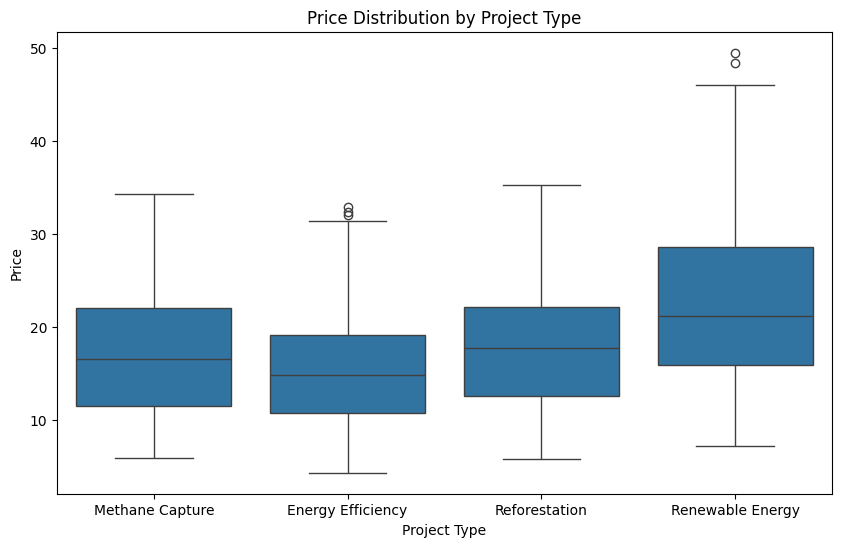

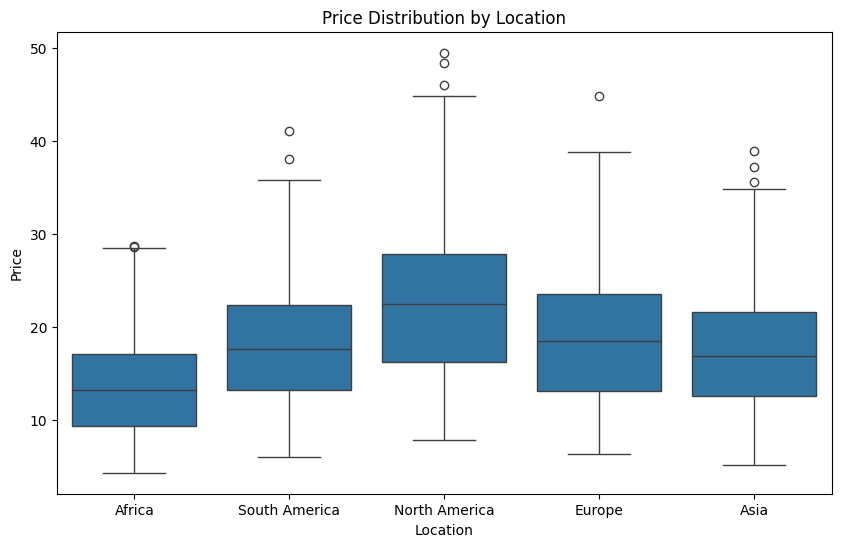

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize impact of project type on price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Project Type', y='Price', data=df)
plt.title('Price Distribution by Project Type')
plt.show()

# Visualize impact of location on price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Price', data=df)
plt.title('Price Distribution by Location')
plt.show()

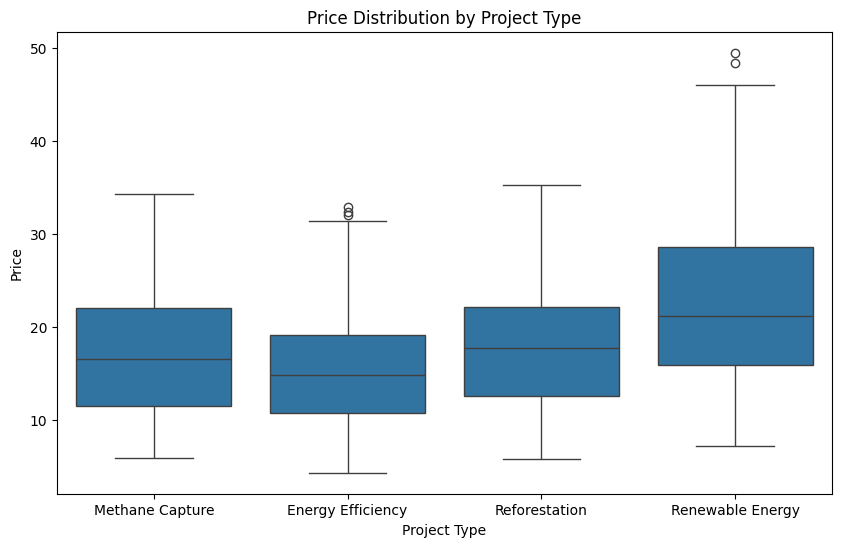

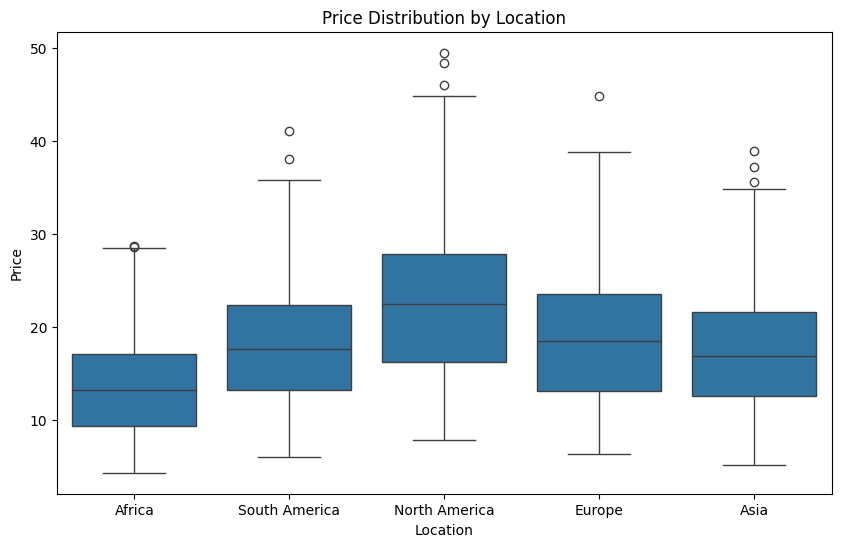

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize impact of project type on price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Project Type', y='Price', data=df)
plt.title('Price Distribution by Project Type')
plt.show()

# Visualize impact of location on price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Price', data=df)
plt.title('Price Distribution by Location')
plt.show()

## Limitations
- The weights assigned to different factors are arbitrary and may not reflect real-world conditions.
- The synthetic dataset may not capture the complexities of actual carbon credit markets.
- Additional factors like market demand, regulatory changes, and economic conditions are not considered.

## Improvements
- Incorporate actual market data to determine more accurate weights.
- Use machine learning techniques to model the pricing based on historical data.
- Include additional factors like project duration, verification standards, and regional policies.